In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

# 单变量分布
histplot() (with kind="hist"; the default)

kdeplot() (with kind="kde")

ecdfplot() (with kind="ecdf"; univariate-only)

其中dist是distribution的简写，不是histogram的简写

In [11]:
data_ = pd.read_csv("dataset/titanic.csv")
data = data_[~np.isnan(data_["age"])]
data.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


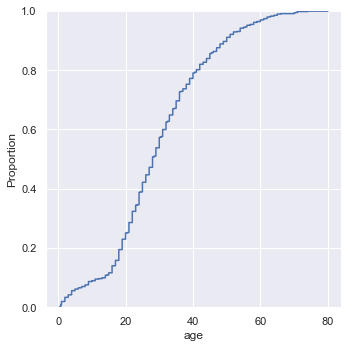

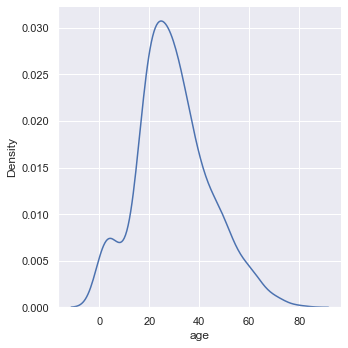

In [40]:
sns.displot(x="age",data=data,kind="ecdf")
sns.displot(x="age",data=data,kind="kde")

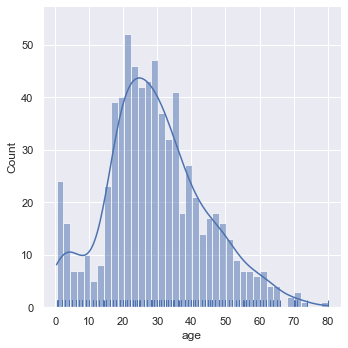

In [38]:
sns.displot(x="age",data=data,kind="hist",bins=40,kde=True,rug=True)

# 二变量分布
多变量分布图可以看出两个变量之间的分布关系。一般都是采用多个图进行表示。多变量分布图采用的函数是jointplot。

x,y,data：绘制图的数据。

kind：scatter、reg、resid、kde、hex。

color：绘制元素的颜色。

height：图的大小，图会是一个正方形。

ratio：主图和副图的比例，只能为一个整型。

space：主图和副图的间距。

dropna：是否需要删除x或者y值中出现了NAN的值。

marginal_kws：副图的一些属性，比如设置bins、rug等。

In [56]:
data = pd.read_csv("dataset/tips.csv")
data1_ = pd.read_csv("athlete_events.csv")
data1 = data1[data1["NOC"]=="CHN"]
data1.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


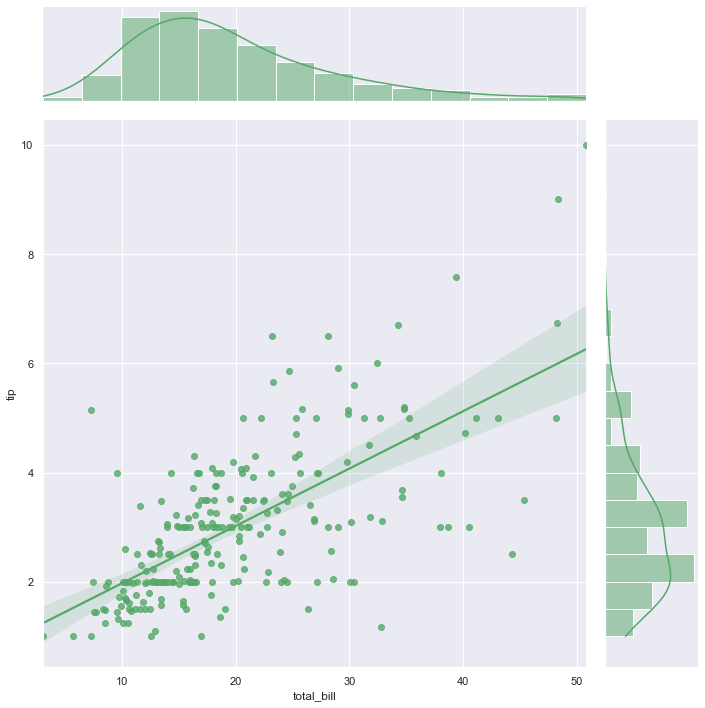

In [77]:
# kind="reg"相对于默认增加了回归直线和kde曲线
sns.jointplot(x="total_bill",y="tip",data=data,kind="reg",color="g",height=10)

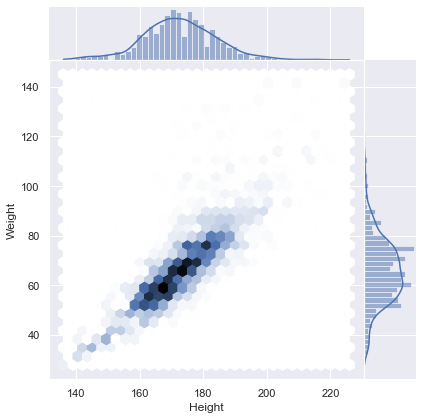

In [75]:
# kind="hex"是绘制六边形图，其中gridsize可以设定六边形的个数
sns.jointplot(x="Height",y="Weight",data=data1,kind="hex",gridsize=30,ratio=6,space=0,dropna=True,marginal_kws={"kde":True})

# 成对绘图（pairplot）

In [79]:
data = pd.read_csv("dataset/iris.csv")
data.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


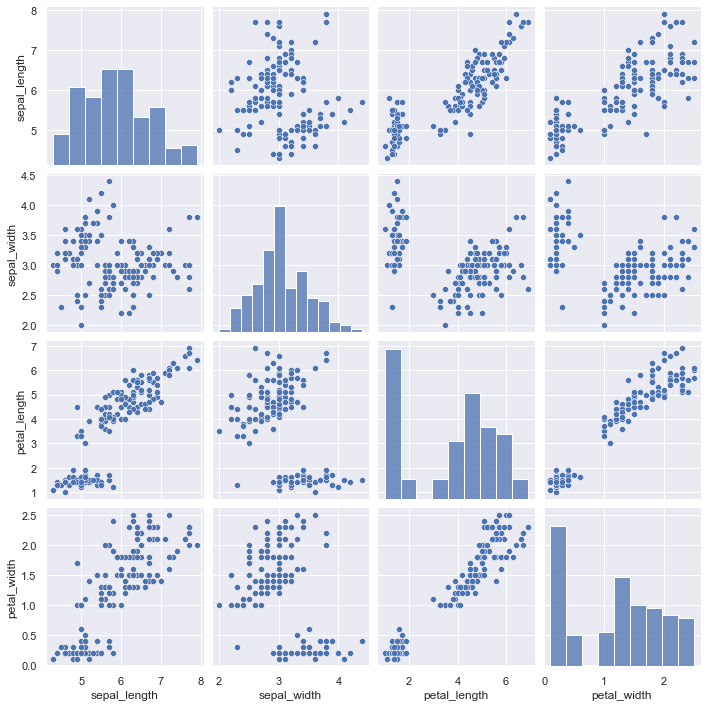

In [80]:
sns.pairplot(data)

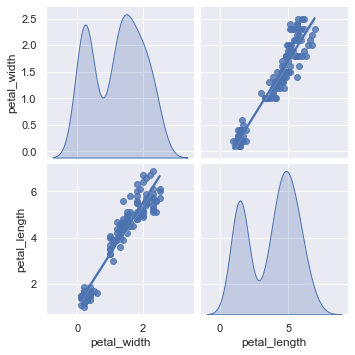

In [84]:
sns.pairplot(data,vars=["petal_width","petal_length"],kind="reg",diag_kind="kde")

# 分布绘图：
1. 单一变量绘图：用的是`distplot`，这个函数不仅仅可以绘制直方图，还可以绘制KDE曲线以及rug线，rug线约集中，说明数据约集中。
2. 多变量绘图：用的是`jointplot`，这个函数比传统的散点图可以展示更多的信息，他是在顶部和右边展示两个直方图。
3. 结对绘图（pairplot）：用的是`pairplot`，可以通过`vars`参数用来控制只需要绘制数据集中的某几个字段。斜对角的图，表示的是数据集中，单一列的分布情况。